## 1. 合并两个有序链表

将两个升序链表合并为一个新的 升序 链表并返回。新链表是通过拼接给定的两个链表的所有节点组成的。 

 

示例 1：

> 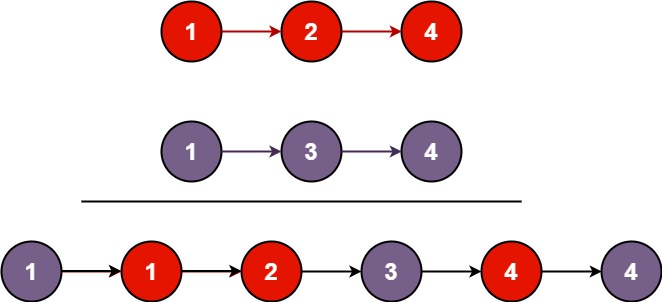
> 
> 输入：l1 = [1,2,4], l2 = [1,3,4]
> 
> 输出：[1,1,2,3,4,4]

示例 2：

> 输入：l1 = [], l2 = []
> 
> 输出：[]
> 
示例 3：

> 输入：l1 = [], l2 = [0]
> 
> 输出：[0]

### 代码

In [7]:
from typing import Optional
# Definition for singly-linked list.
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next

# 这么写会在 while 报错（虽然这么写算法是错的，但是感觉语法没有问题）：
# AttributeError: 'NoneType' object has no attribute 'next'
# 

# 经过 debug 发现是因为最后一次迭代，l1 指向 None，其没有 next 这个key 。
class Solution:
    def mergeTwoLists(self, list1: ListNode, list2: ListNode) -> Optional[ListNode]:
        res = ListNode()
        head = res
        while list1.next is not None or list2.next is not None:
            if list1.val <= list2.val:
                head.next = list1
                list1 = list1.next
            else:
                head.next = list2
                list2 = list2.next
            head = head.next
        return res.next

In [8]:
# 改成了这种写法，不判断 next，判断节点本身。
class Solution:
    def mergeTwoLists(self, list1: ListNode, list2: ListNode) -> Optional[ListNode]:
        res = ListNode()
        head = res
        while list1 and list2:
            if list1.val <= list2.val:
                head.next = list1
                list1 = list1.next
            else:
                head.next = list2
                list2 = list2.next
            head = head.next
        head.next = list1 if list1 else list2
        return res.next

#### 递归写法

In [9]:
# 作者：腐烂的橘子
# 链接：https://leetcode.cn/problems/merge-two-sorted-lists/solutions/103891/yi-kan-jiu-hui-yi-xie-jiu-fei-xiang-jie-di-gui-by-/
class Solution:
    def mergeTwoLists(self, l1: ListNode, l2: ListNode) -> ListNode:
        if not l1: return l2  # 终止条件，直到两个链表都空
        if not l2: return l1
        if l1.val <= l2.val:  # 递归调用
            l1.next = self.mergeTwoLists(l1.next,l2)
            return l1
        else:
            l2.next = self.mergeTwoLists(l1,l2.next)
            return l2


## 2. 反转链表

给你单链表的头节点 head ，请你反转链表，并返回反转后的链表。
 

示例 1：

> 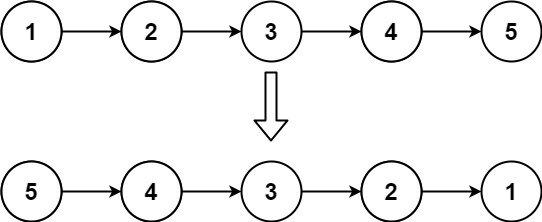
> 
> 输入：head = [1,2,3,4,5]
> 
> 输出：[5,4,3,2,1]

示例 2：

> 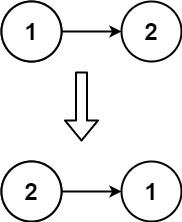
> 
> 输入：head = [1,2]
> 
> 输出：[2,1]

示例 3：

> 输入：head = []
> 
> 输出：[]

### 代码

直接循环遍历一遍：

In [2]:
# Definition for singly-linked list.
from typing import Optional
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next
class Solution:
    def reverseList(self, head: Optional[ListNode]) -> Optional[ListNode]:
        if not head:
            return head 
        n1 = None
        n2 = head
        while n2:
            n = n2.next
            n2.next = n1
            n1 = n2
            n2 = n

        return n1

再训练一下递归：

In [3]:
# Definition for singly-linked list.
# class ListNode:
#     def __init__(self, val=0, next=None):
#         self.val = val
#         self.next = next
class Solution:
    def reverseList(self, head: Optional[ListNode]) -> Optional[ListNode]:
        def mid(cur, pre):
            if not cur: return pre
            res = mid(cur.next, cur)
            cur.next = pre
            return res

        return mid(head, None)

## 3. 两数相加

给你两个 非空 的链表，表示两个非负的整数。它们每位数字都是按照 逆序 的方式存储的，并且每个节点只能存储 一位 数字。

请你将两个数相加，并以相同形式返回一个表示和的链表。

你可以假设除了数字 0 之外，这两个数都不会以 0 开头。

 

示例 1：

> 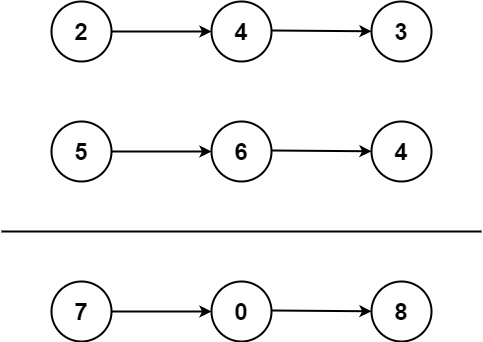
> 
> 输入：l1 = [2,4,3], l2 = [5,6,4]
> 
> 输出：[7,0,8]
> 
> 解释：342 + 465 = 807.

示例 2：

> 输入：l1 = [0], l2 = [0]
> 
> 输出：[0]

示例 3：

> 输入：l1 = [9,9,9,9,9,9,9], l2 = [9,9,9,9]
> 
> 输出：[8,9,9,9,0,0,0,1]

### 代码

In [4]:
# Definition for singly-linked list.
# class ListNode:
#     def __init__(self, val=0, next=None):
#         self.val = val
#         self.next = next
class Solution:
    def addTwoNumbers(self, l1: Optional[ListNode], l2: Optional[ListNode]) -> Optional[ListNode]:
        resNode = ListNode()
        head = resNode
        carry = 0

        while(l1 or l2):
            x = l1.val if l1 else 0
            y = l2.val if l2 else 0
            sumNum = x + y +carry
            carry = sumNum // 10
            head.next = ListNode(sumNum % 10)
            head = head.next
            if(l1 is not None):
                l1 = l1.next
            if(l2 is not None):
                l2 = l2.next
        if(carry > 0):
            head.next = ListNode(val=1)
        return resNode.next


## 4. 两数相加 Ⅱ

给你两个 非空 链表来代表两个非负整数。数字最高位位于链表开始位置。它们的每个节点只存储一位数字。将这两数相加会返回一个新的链表。

你可以假设除了数字 0 之外，这两个数字都不会以零开头。

 

示例1：

> 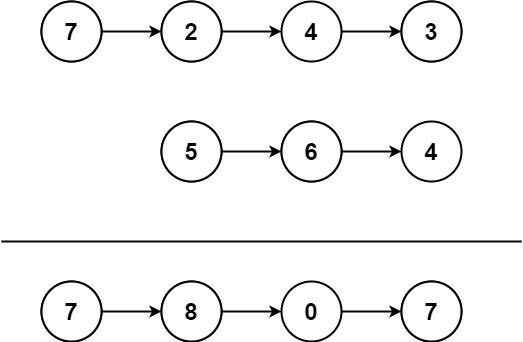
> 
> 输入：l1 = [7,2,4,3], l2 = [5,6,4]
> 
> 输出：[7,8,0,7]

示例2：

> 输入：l1 = [2,4,3], l2 = [5,6,4]
> 
> 输出：[8,0,7]

示例3：

> 输入：l1 = [0], l2 = [0]
> 
> 输出：[0]

### 代码

反转链表 + 两数相加 秒了。

In [5]:
# Definition for singly-linked list.
# class ListNode:
#     def __init__(self, val=0, next=None):
#         self.val = val
#         self.next = next

class Solution:
    def reverseList(self, head: Optional[ListNode]) -> Optional[ListNode]:
        def mid(cur, pre):
            if not cur: return pre
            res = mid(cur.next, cur)
            cur.next = pre
            return res

        return mid(head, None)
    def addTwoNumbers(self, l1: Optional[ListNode], l2: Optional[ListNode]) -> Optional[ListNode]:
        l1 = self.reverseList(l1)
        l2 = self.reverseList(l2)
        resNode = ListNode()
        head = resNode
        carry = 0

        while(l1 or l2):
            x = l1.val if l1 else 0
            y = l2.val if l2 else 0
            sumNum = x + y +carry
            carry = sumNum // 10
            head.next = ListNode(sumNum % 10)
            head = head.next
            if(l1 is not None):
                l1 = l1.next
            if(l2 is not None):
                l2 = l2.next
        if(carry > 0):
            head.next = ListNode(val=1)
        return self.reverseList(resNode.next)